<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/3d_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf

In [95]:
np.random.seed(1233231)
x1 = np.random.random(5000)
x2 = np.random.random(5000)
x3 = np.random.random(5000)


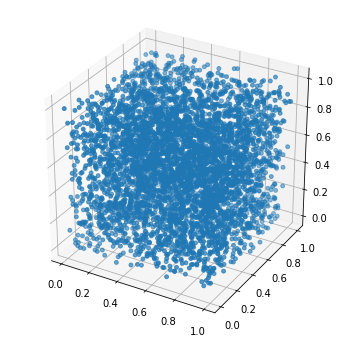

In [96]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3 ,marker='o', s=15, cmap='Greens')

In [97]:
def classify_data(x1, x2, x3):
    target = []
    for i in range(len(x1)):
        if x1[i] < 0.5 and x2[i] < 0.5 and x3[i] < 0.5:
            target.append('type1')
        elif x1[i] >= 0.5 and x2[i] < 0.5 and x3[i] < 0.5:
            target.append('type2')
        elif x1[i] < 0.5 and x2[i] >= 0.5 and x3[i] < 0.5:
            target.append('type3')
        elif x1[i] >= 0.5 and x2[i] >= 0.5 and x3[i] < 0.5:
            target.append('type4')
        elif x1[i] < 0.5 and x2[i] < 0.5 and x3[i] >= 0.5:
            target.append('type5')
        elif x1[i] >= 0.5 and x2[i] < 0.5 and x3[i] >= 0.5:
            target.append('type6')
        elif x1[i] < 0.5 and x2[i] >= 0.5 and x3[i] >= 0.5:
            target.append('type7')
        elif x1[i] >= 0.5 and x2[i] >= 0.5 and x3[i] >= 0.5:
            target.append('type8')
    return np.array(target)

In [98]:
target = classify_data(x1, x2, x3)
print(target[0 : 10])

['type3' 'type1' 'type3' 'type1' 'type4' 'type4' 'type2' 'type6' 'type4'
 'type1']


In [99]:
print(len(target[target == 'type1']))
print(len(target[target == 'type2']))
print(len(target[target == 'type3']))
print(len(target[target == 'type4']))
print(len(target[target == 'type5']))
print(len(target[target == 'type6']))
print(len(target[target == 'type7']))
print(len(target[target == 'type8']))

617
634
595
626
633
618
654
623


In [100]:
print(x1)

[0.16305852 0.07648301 0.0612393  ... 0.60261777 0.88429178 0.17030463]


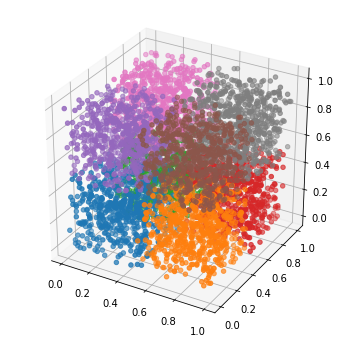

In [101]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[target == 'type1'], x2[target == 'type1'], x3[target == 'type1'] , 'b.')
ax.scatter(x1[target == 'type2'], x2[target == 'type2'], x3[target == 'type2'] , 'r.')
ax.scatter(x1[target == 'type3'], x2[target == 'type3'], x3[target == 'type3'] , 'g.')
ax.scatter(x1[target == 'type4'], x2[target == 'type4'], x3[target == 'type4'] , 'y.')
ax.scatter(x1[target == 'type5'], x2[target == 'type5'], x3[target == 'type5'] , 'Greys.')
ax.scatter(x1[target == 'type6'], x2[target == 'type6'], x3[target == 'type6'] , 'Purples.')
ax.scatter(x1[target == 'type7'], x2[target == 'type7'], x3[target == 'type7'] , 'Oranges.')
ax.scatter(x1[target == 'type8'], x2[target == 'type8'], x3[target == 'type8'] , 'BuPu.')


데이터 합치기

In [102]:
def merge_data(x1, x2, x3):
    ret = []
    for i in range(len(x1)):
        ret.append([x1[i], x2[i], x3[i]])
    return np.array(ret)

In [103]:
data = merge_data(x1, x2, x3)
data[0 : 5]

array([[0.16305852, 0.81333089, 0.46611907],
       [0.07648301, 0.44851228, 0.1147937 ],
       [0.0612393 , 0.85342543, 0.32098054],
       [0.43600922, 0.10960804, 0.36986653],
       [0.92321732, 0.82960001, 0.19003674]])

범주화 작업

In [104]:
encoder = LabelBinarizer()
print(target[0 : 10])

# binary로 바꿈, 본인이 필요시 만들어도 됨
target = encoder.fit_transform(target)

print(target[0 : 10])
print(encoder.classes_)

['type3' 'type1' 'type3' 'type1' 'type4' 'type4' 'type2' 'type6' 'type4'
 'type1']
[[0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
['type1' 'type2' 'type3' 'type4' 'type5' 'type6' 'type7' 'type8']


In [105]:
trn=2500
x_train = data[0 : trn]
t_train = target[0 : trn]

#2500부터 5000까지 test함
x_test = data[trn : ]
t_test = target[trn : ]

In [106]:
from keras import optimizers
# optimizer = running rate 다르게
# running rate는 가중치 변화량에대한 변수임임

In [107]:
model1 = Sequential()

# 입력이 2개 activation: signoid 16개, hidden layer 2개 
model1.add(Dense(16, input_dim = 3, activation = 'sigmoid' ))
model1.add(Dense(16, activation = 'sigmoid' ))
model1.add(Dense(8, activation = 'softmax'))

# model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
# model1.compile(optimizer = optimizers.Adam(lr = 0.001), loss = 'mean_squared_error')

#running rate가 클 경우에는 빠르게 accracy가 증가하지만 오실레이션이 증가할 수 있음
#적당한 크기로 하는 것이 좋음#running rate가 클 경우에는 빠르게 accracy가 증가하지만 오실레이션이 증가할 수 있음
#적당한 크기로 하는 것이 좋음

# fit 은 학습을 시키는 것 batch는 몇개마다 학습을 시킬것인가
hist1 = model1.fit(x_train, t_train, epochs = 200, batch_size = 100)

Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.1226
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.1307
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.1274
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.1510
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.2316
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.2388
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.2158
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.1564
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.1783
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.1931
Epoch 11/

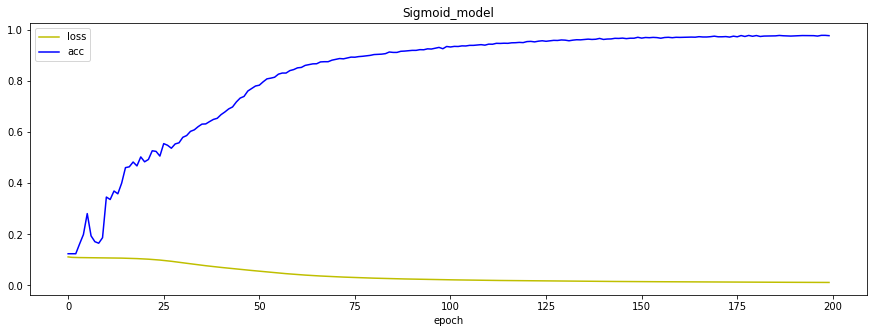

In [108]:
plt.figure(figsize = (15, 5))
plt.plot(hist1.history['loss'], 'y', label = 'loss')
plt.plot(hist1.history['accuracy'], 'b', label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc = 'best')
plt.show()

In [109]:
# test 데이터 평가
model1_test_loss_and_metrics = model1.evaluate(x_test, t_test, batch_size = 20)
model1_train_loss_and_metrics = model1.evaluate(x_train, t_train, batch_size = 20)
model1_test_loss_and_metrics
model1_train_loss_and_metrics
print(model1.predict(x_test[[0]]))
print(x_test[0])
print(t_test[0])

125/125 [==============================] - 0s 918us/step - loss: 0.0115 - accuracy: 0.9788
[[2.1202069e-04 3.0483010e-01 7.0613634e-05 1.1392128e-01 6.8526220e-04
  4.1193876e-01 1.1608616e-04 1.6822581e-01]]
[0.91145099 0.47488522 0.52422179]
[0 0 0 0 0 1 0 0]


In [110]:
predict1 = model1.predict(x_test)

In [111]:
a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []
c1 = []
c2 = []
c3 = []
d1 = []
d2 = []
d3 = []
e1 = []
e2 = []
e3 = []
f1 = []
f2 = []
f3 = []
g1 = []
g2 = []
g3 = []
h1 = []
h2 = []
h3 = []
for i in range(len(x_test)):
  if np.argmax(predict1[i])== 0:
    a1.append(x_test[i,0])
    a2.append(x_test[i,1])
    a3.append(x_test[i,2])
  if np.argmax(predict1[i])== 1:
    b1.append(x_test[i,0])
    b2.append(x_test[i,1])
    b3.append(x_test[i,2])
  if np.argmax(predict1[i])== 2:
    c1.append(x_test[i,0])
    c2.append(x_test[i,1])
    c3.append(x_test[i,2])
  if np.argmax(predict1[i])== 3:
    d1.append(x_test[i,0])
    d2.append(x_test[i,1])
    d3.append(x_test[i,2])
  if np.argmax(predict1[i])== 4:
    e1.append(x_test[i,0])
    e2.append(x_test[i,1])
    e3.append(x_test[i,2])
  if np.argmax(predict1[i])== 5:
    f1.append(x_test[i,0])
    f2.append(x_test[i,1])
    f3.append(x_test[i,2])
  if np.argmax(predict1[i])== 6:
    g1.append(x_test[i,0])
    g2.append(x_test[i,1])
    g3.append(x_test[i,2])
  if np.argmax(predict1[i])== 7:
    h1.append(x_test[i,0])
    h2.append(x_test[i,1])
    h3.append(x_test[i,2])

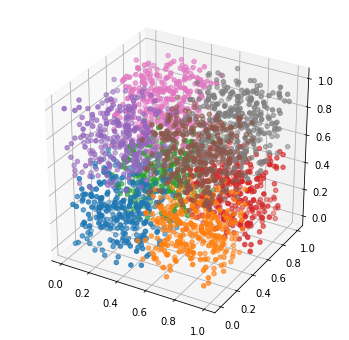

In [112]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1, a2, a3, 'r.')
ax.scatter(b1, b2, b3 , 'b.')
ax.scatter(c1, c2, c3 , 'g.')
ax.scatter(d1, d2, d3, 'y.')
ax.scatter(e1, e2, e3 , 'Greys.')
ax.scatter(f1, f2, f3 , 'Purples.')
ax.scatter(g1, g2, g3 , 'Oranges.')
ax.scatter(h1, h2, h3 , 'BuPu.')